In [1]:
import pyspark
import pandas as pd
import numpy as np
import scipy.stats as stats
from pyspark.sql.functions import col, log10
import seaborn as sns

In [2]:
from pyspark.sql import SparkSession, functions as f
import geopandas as gpd

In [3]:
spark = (
    SparkSession.builder.appName("MAST30034 Tutorial 1")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.executor.memory", "4g")
    .config("spark.driver.memory", "8g")
    .getOrCreate()
)

spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")

22/08/29 03:07:09 WARN Utils: Your hostname, DESKTOP-4QJNQQU resolves to a loopback address: 127.0.1.1; using 172.17.232.92 instead (on interface eth0)
22/08/29 03:07:09 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/29 03:07:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/08/29 03:07:12 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


# Univariate Analysis

## Yellow -

In [4]:
yellow = spark.read.parquet('../clean_data/yellow_clean.parquet')

In [5]:
yellow_numerical = yellow.select(yellow['trip_distance'], yellow['fare_amount'], yellow['tip_amount'], yellow['total_amount'])

In [6]:
yellow

tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,pulocation_id,dolocation_id,fare_amount,tip_amount,total_amount
2022-01-01 00:35:40,2022-01-01 00:53:29,6.08,142,236,20.88,5.255999999999999,31.607999999999997
2022-01-01 00:33:43,2022-01-01 00:42:07,3.3600000000000003,236,42,11.52,5.76,19.152
2022-01-01 00:53:21,2022-01-01 01:02:19,1.552,166,166,10.799999999999999,2.5343999999999998,15.2064
2022-01-01 00:36:48,2022-01-01 01:14:20,6.88,68,163,33.839999999999996,4.32,43.632
2022-01-01 00:40:15,2022-01-01 01:09:48,16.48,138,161,47.519999999999996,18.72,81.144
2022-01-01 00:20:50,2022-01-01 00:34:58,8.112,233,87,24.48,7.4879999999999995,37.44
2022-01-01 00:30:02,2022-01-01 00:44:49,4.336,166,236,17.28,3.2399999999999998,25.992
2022-01-01 00:56:34,2022-01-01 01:12:04,3.4560000000000004,246,79,16.56,4.4064,26.438399999999998
2022-01-01 00:39:46,2022-01-01 00:47:36,2.288,43,140,10.799999999999999,3.2543999999999995,19.5264
2022-01-01 00:33:52,2022-01-01 00:47:28,6.720000000000001,148,141,20.16,4.968,29.88


In [7]:
yellow_categorical = yellow.select(yellow['tpep_pickup_datetime'], yellow['tpep_dropoff_datetime'], yellow['pulocation_id'], \
                                  yellow['dolocation_id'])

### Numerical

In [8]:
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

## Log Transformations required for all variables to take an approximate normal distribution (to suit model assumptions)

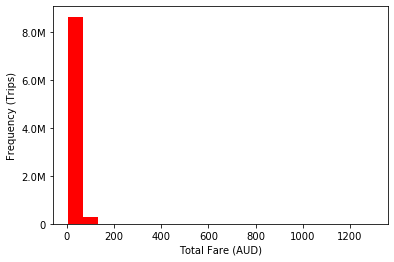

In [9]:
# Code taken from - https://stackoverflow.com/questions/39154325/pyspark-show-histogram-of-a-data-frame-column
# Searched for 'pyspark histogram of column'

fig, ax = plt.subplots()
hist(ax, yellow_numerical.select('total_amount'), bins = 20, color=['red'])
plt.xlabel('Total Fare (AUD)')
plt.ylabel('Frequency (Trips)')
plt.show()

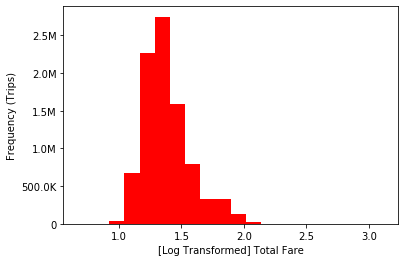

In [10]:
yellow_numerical = yellow_numerical.withColumn("log_total", log10(col("total_amount")))

fig, ax = plt.subplots()
hist(ax, yellow_numerical.select('log_total'), bins = 20, color=['red'])
plt.xlabel('[Log Transformed] Total Fare')
plt.ylabel('Frequency (Trips)')
plt.show()

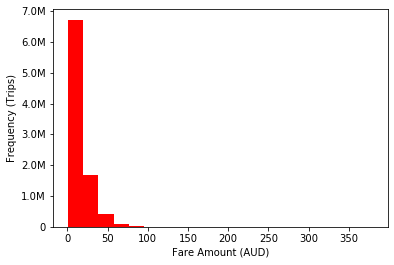

In [11]:
fig, ax = plt.subplots()
hist(ax, yellow_numerical.select('fare_amount'), bins = 20, color=['red'])
plt.xlabel('Fare Amount (AUD)')
plt.ylabel('Frequency (Trips)')
plt.show()

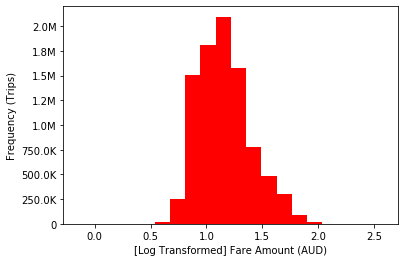

In [12]:
yellow_numerical = yellow_numerical.withColumn("log_fare", log10(col("fare_amount")))

fig, ax = plt.subplots()
hist(ax, yellow_numerical.select('log_fare'), bins = 20, color=['red'])
plt.xlabel('[Log Transformed] Fare Amount (AUD)')
plt.ylabel('Frequency (Trips)')
plt.show()

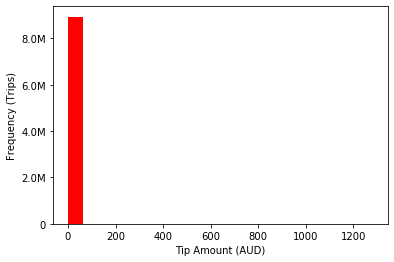

In [13]:
fig, ax = plt.subplots()
hist(ax, yellow_numerical.select('tip_amount'), bins = 20, color=['red'])
plt.xlabel('Tip Amount (AUD)')
plt.ylabel('Frequency (Trips)')
plt.show()

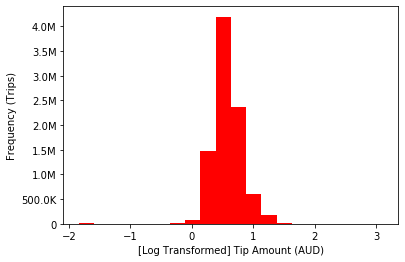

In [14]:
yellow_numerical = yellow_numerical.withColumn("log_tip", log10(col("tip_amount")))

fig, ax = plt.subplots()
hist(ax, yellow_numerical.select('log_tip'), bins = 20, color=['red'])
plt.xlabel('[Log Transformed] Tip Amount (AUD)')
plt.ylabel('Frequency (Trips)')
plt.show()

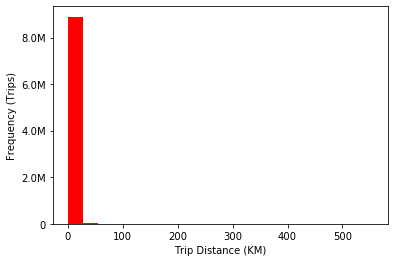

In [15]:
fig, ax = plt.subplots()
hist(ax, yellow_numerical.select('trip_distance'), bins = 20, color=['red'])
plt.xlabel('Trip Distance (KM)')
plt.ylabel('Frequency (Trips)')
plt.show()

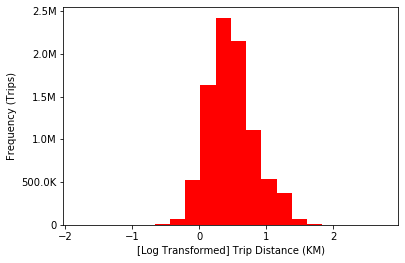

In [16]:
yellow_numerical = yellow_numerical.withColumn("log_distance", log10(col("trip_distance")))

fig, ax = plt.subplots()
hist(ax, yellow_numerical.select('log_distance'), bins = 20, color=['red'])
plt.xlabel('[Log Transformed] Trip Distance (KM)')
plt.ylabel('Frequency (Trips)')
plt.show()

# Dropping original versions of variables. Will pass logged form on to model, need to remember to revert in interpretation

In [17]:
yellow_numerical = yellow_numerical.drop('trip_distance', 'fare_amount', 'tip_amount', 'total_amount')

# Property -

## Numerical -

In [19]:
property_df = spark.read.parquet('../clean_data/property_clean.parquet')
property_df = property_df.drop('__index_level_0__')

In [20]:
property_df.limit(3)

borough,neighbourhood,building_class,year_built,sale_price,gross_sq_metres
bronx,BATHGATE,01,1952,720000,261.98657280000003
bronx,BATHGATE,01,1910,499999,117.05783040000001
bronx,BATHGATE,01,1910,599000,120.40233984000001


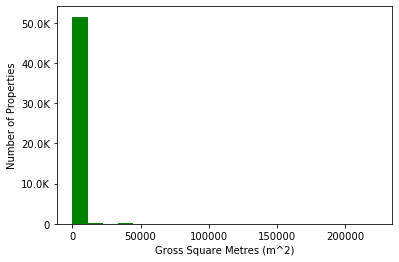

In [21]:
fig, ax = plt.subplots()
hist(ax, property_df.select('gross_sq_metres'), bins = 20, color=['green'])
plt.xlabel('Gross Square Metres (m^2)')
plt.ylabel('Number of Properties')
plt.show()

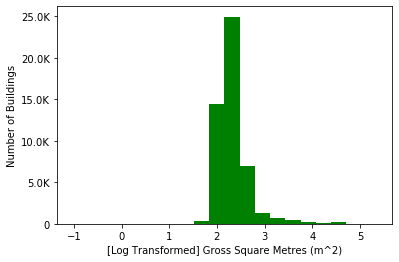

In [22]:
property_df = property_df.withColumn("log_sq_metres", log10(col("gross_sq_metres")))
fig, ax = plt.subplots()
hist(ax, property_df.select('log_sq_metres'), bins = 20, color=['green'])
plt.xlabel('[Log Transformed] Gross Square Metres (m^2)')
plt.ylabel('Number of Buildings')
plt.show()

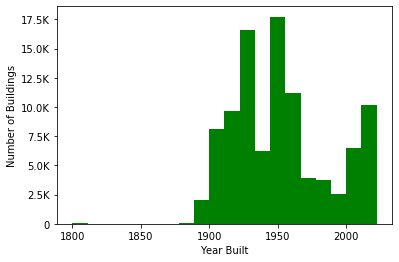

In [23]:
fig, ax = plt.subplots()
hist(ax, property_df.select('year_built'), bins = 20, color=['green'])
plt.xlabel('Year Built')
plt.ylabel('Number of Buildings')
plt.show()

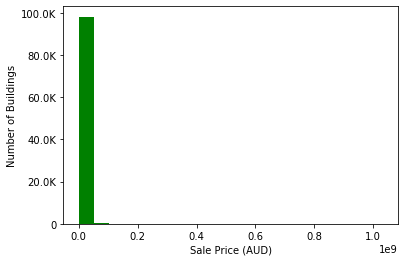

In [24]:
fig, ax = plt.subplots()
hist(ax, property_df.select('sale_price'), bins = 20, color=['green'])
plt.xlabel('Sale Price (AUD)')
plt.ylabel('Number of Buildings')
plt.show()

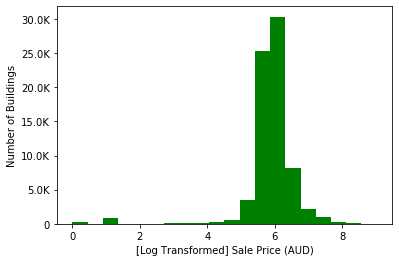

In [25]:
property_df = property_df.withColumn("log_sale_price", log10(col("sale_price")))
fig, ax = plt.subplots()
hist(ax, property_df.select('log_sale_price'), bins = 20, color=['green'])
plt.xlabel('[Log Transformed] Sale Price (AUD)')
plt.ylabel('Number of Buildings')
plt.show()

### Categorical -

In [26]:
property_categorical = property_df.select(property_df['borough'], property_df['neighbourhood'], property_df['building_class'])

In [27]:
property_numerical = property_df.select(property_df['year_built'], property_df['sale_price'], property_df['log_sq_metres'])

In [28]:
property_categorical.limit(3)

borough,neighbourhood,building_class
bronx,BATHGATE,01
bronx,BATHGATE,01
bronx,BATHGATE,01


In [29]:
building_class = property_categorical.select('building_class').toPandas()

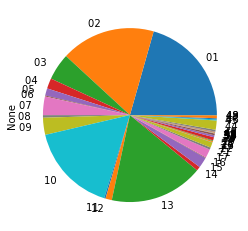

In [30]:
building_class.groupby('building_class').size().plot(kind = 'pie')
plt.show()

In [31]:
property_categorical = property_categorical.select('borough').toPandas()

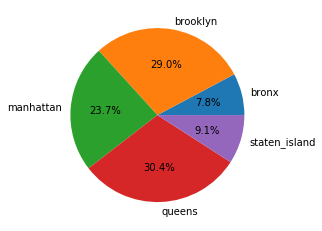

In [32]:
property_categorical.groupby('borough').size().plot(kind = 'pie', autopct = '%1.1f%%')
plt.ylabel('')
plt.show()

# Bivariate

## Yellow

In [33]:
yellow_numerical_pd = yellow_numerical.toPandas()

### Note -

I tried plotting all data points in `yellow_numerical`, but there was far too much data for the visualisation to be useful for anything.

I then tried sampling different percentages of the data and settled on `frac = .001`

In [34]:
# pd.plotting.scatter_matrix(yellow_numerical_pd)
# plt.show()

### Note -

cant figure out how to rotate yticklabels

Have tried:

- ax.set_yticklabels(yellow_numerical_sample.columns, rotation = 90)
- plt.set_yticklabels...
- passing param: rot = 90

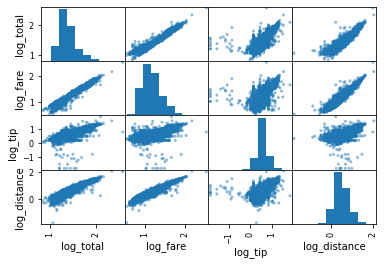

In [35]:
yellow_numerical_sample = yellow_numerical_pd.sample(frac = .001, random_state = 637)
pd.plotting.scatter_matrix(yellow_numerical_sample)
plt.show()

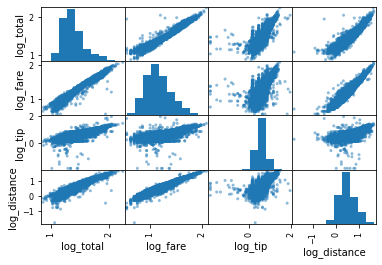

In [36]:
yellow_numerical_sample = yellow_numerical_pd.sample(frac = .001, random_state = 123)
pd.plotting.scatter_matrix(yellow_numerical_sample)
plt.show()

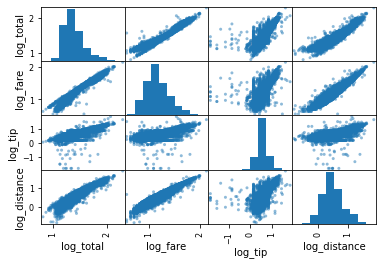

In [37]:
yellow_numerical_sample = yellow_numerical_pd.sample(frac = .001, random_state = 999)
pd.plotting.scatter_matrix(yellow_numerical_sample)
plt.show()

# Get similar plots for different random seeds. Will use the first visualisation in report

In [38]:
property_numerical_pd = property_numerical.toPandas()

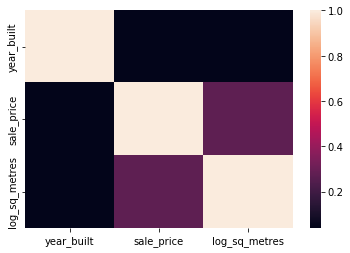

In [39]:
#df = property_numerical_pd.drop(columns = ['sale_price', 'gross_sq_feet', 'gross_sq_metres'])


corr = property_numerical_pd.corr()
sns.heatmap(corr)

Tells us what one wouldv'e though intuitively - sale price is highly correlated with area of the house, but it's always good to confirm instead of assuming

Year built doesn't seem to have a correlation with the sale price at all

# Feature Engineering -

### Creating granular detail - pickup day and hour

In [40]:
yellow_categorical_pd = yellow_categorical.toPandas()

In [41]:
yellow_categorical_pd['pickup_day'] = yellow_categorical_pd['tpep_pickup_datetime'].dt.day_name()

In [42]:
yellow_categorical_pd['pickup_hour'] =yellow_categorical_pd['tpep_pickup_datetime'].dt.hour # 24H time

In [43]:
yellow_categorical_pd

,tpep_pickup_datetime,tpep_dropoff_datetime,pulocation_id,dolocation_id,pickup_day,pickup_hour
0,2022-01-01 00:35:40,2022-01-01 00:53:29,142,236,Saturday,0
1,2022-01-01 00:33:43,2022-01-01 00:42:07,236,42,Saturday,0
2,2022-01-01 00:53:21,2022-01-01 01:02:19,166,166,Saturday,0
3,2022-01-01 00:36:48,2022-01-01 01:14:20,68,163,Saturday,0
4,2022-01-01 00:40:15,2022-01-01 01:09:48,138,161,Saturday,0
...,...,...,...,...,...,...
8933240,2022-04-30 23:53:55,2022-05-01 00:09:47,43,233,Saturday,23
8933241,2022-03-08 00:09:21,2022-03-08 00:41:59,138,265,Tuesday,0
8933242,2022-03-16 05:05:15,2022-03-16 05:05:21,163,163,Wednesday,5
8933243,2022-03-16 22:34:05,2022-03-16 22:37:45,163,229,Wednesday,22


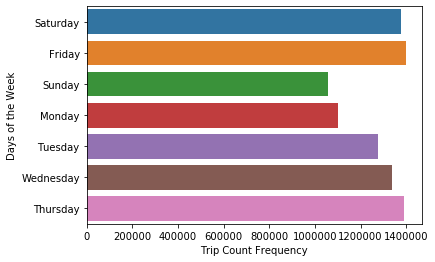

In [44]:
ax = sns.countplot(y = 'pickup_day', data = yellow_categorical_pd)
ax.set(xlabel = 'Trip Count Frequency', ylabel = 'Days of the Week')
plt.show()

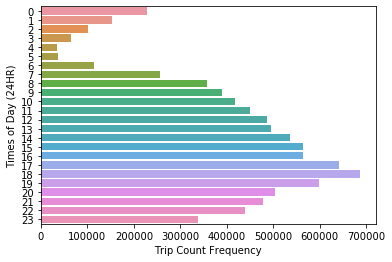

In [45]:
ax = sns.countplot(y = 'pickup_hour', data = yellow_categorical_pd)
ax.set(xlabel = 'Trip Count Frequency', ylabel = 'Times of Day (24HR)')
plt.show()

In [46]:
saturday = yellow_categorical_pd.loc[yellow_categorical_pd['pickup_day'] == 'Saturday']
friday = yellow_categorical_pd.loc[yellow_categorical_pd['pickup_day'] == 'Friday']
thursday = yellow_categorical_pd.loc[yellow_categorical_pd['pickup_day'] == 'Thursday']

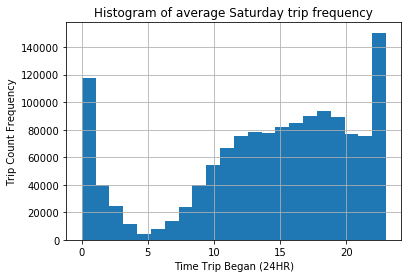

In [47]:
saturday['pickup_hour'].plot.hist(grid = True, bins = 22)
plt.title('Histogram of average Saturday trip frequency')
plt.xlabel('Time Trip Began (24HR)')
plt.ylabel('Trip Count Frequency')
plt.show()

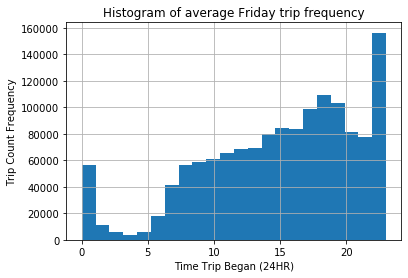

In [48]:
friday['pickup_hour'].plot.hist(grid = True, bins = 22)
plt.title('Histogram of average Friday trip frequency')
plt.xlabel('Time Trip Began (24HR)')
plt.ylabel('Trip Count Frequency')
plt.show()

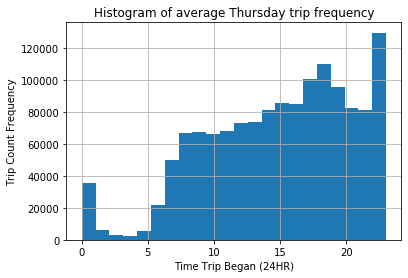

In [49]:
thursday['pickup_hour'].plot.hist(grid = True, bins = 22)
plt.title('Histogram of average Thursday trip frequency')
plt.xlabel('Time Trip Began (24HR)')
plt.ylabel('Trip Count Frequency')
plt.show()

# Geospatial

In [50]:
sf = gpd.read_file("../raw_data/taxi_zones.shp")
zones = pd.read_csv("../raw_data/taxi+_zone_lookup.csv")

In [51]:
gdf = pd.read_csv('../clean_data/gdf.csv', index_col = False)
gdf = gdf.drop(columns = 'Unnamed: 0')

geoJSON = gdf[['LocationID','geometry']].drop_duplicates('LocationID').to_json()

In [52]:
counts = yellow.groupby('pulocation_id').count()

In [53]:
counts

pulocation_id,count
148,89781
243,453
31,25
137,120376
85,21
65,4797
255,2419
53,14
133,62
78,34


In [54]:
sf

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824...."


In [55]:
yellow_categorical_pd

,tpep_pickup_datetime,tpep_dropoff_datetime,pulocation_id,dolocation_id,pickup_day,pickup_hour
0,2022-01-01 00:35:40,2022-01-01 00:53:29,142,236,Saturday,0
1,2022-01-01 00:33:43,2022-01-01 00:42:07,236,42,Saturday,0
2,2022-01-01 00:53:21,2022-01-01 01:02:19,166,166,Saturday,0
3,2022-01-01 00:36:48,2022-01-01 01:14:20,68,163,Saturday,0
4,2022-01-01 00:40:15,2022-01-01 01:09:48,138,161,Saturday,0
...,...,...,...,...,...,...
8933240,2022-04-30 23:53:55,2022-05-01 00:09:47,43,233,Saturday,23
8933241,2022-03-08 00:09:21,2022-03-08 00:41:59,138,265,Tuesday,0
8933242,2022-03-16 05:05:15,2022-03-16 05:05:21,163,163,Wednesday,5
8933243,2022-03-16 22:34:05,2022-03-16 22:37:45,163,229,Wednesday,22


In [60]:
yellow_numerical_pd.to_parquet('../clean_data/yellow_numerical_pd')

In [73]:
property_pd = property_df.toPandas()

In [76]:
property_pd['borough'].unique()

array(['bronx', 'brooklyn', 'manhattan', 'queens', 'staten_island'],
      dtype=object)

In [88]:
gdf['Borough'] = gdf['Borough'].str.lower()
gdf = gdf[gdf.Borough != 'ewr']
gdf = gdf.rename(columns = {'Borough':'borough'})

KeyError: 'Borough'